[View in Colaboratory](https://colab.research.google.com/github/MADscientist314/TensorFlow/blob/master/MNIST_tutorial.ipynb)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [6]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [7]:
mnist.train.images.shape

(55000, 784)

In [12]:
sample_img = mnist.train.images[5].reshape(28,28)
sample_img

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

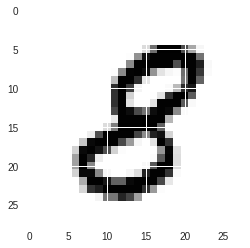

In [16]:
#plot the image
plt.imshow(sample_img).set_cmap('Greys')

In [17]:
# check MNIST labels shape
mnist.train.labels.shape

(55000, 10)

In [18]:
sample_label = mnist.train.labels[5]
sample_label

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [0]:
# define a neural network (softmax logistic regression)
import tensorflow as tf
x = tf.placeholder(tf.float32, [None, 784]) #define x as the input
W = tf.Variable(tf.zeros([784, 10])) # define w as the hidden state 1

b = tf.Variable(tf.zeros([10])) #define b as the hidden state 2
y = tf.nn.softmax(tf.matmul(x, W) + b) #  define the equation using softmax logistic regression 

In [21]:
# define the train step to minimize the cross entropy with SGD
y_ = tf.placeholder(tf.float32, [None, 10]) #define y_ as a placeholder for your input from the findings of the first round of selection
cross_entropy = -tf.reduce_sum(y_*tf.log(y)) # minimize loss somehow??
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy) #Also a magic box for optimization
train_step # conduct the optimization step

<tf.Operation 'GradientDescent_1' type=NoOp>

In [0]:
# initialize variables and session 
init = tf.global_variables_initializer() # initialize the global variable
sess = tf.Session() # begin a session
sess.run(init) #run the session

# train the model mini batch with 100 elements, for 1K times
for i in range(1000): #relearn this thing by rerunning it 1000 arbitrary number times
    batch_xs, batch_ys = mnist.train.next_batch(100) #define batch_x and batch y  in increments of 100?
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys}) # run the session with the 100 batches pooled together

In [31]:
# evaluate the accuracy of the model
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1)) # run the statistics to see how close the computer got to the real thing
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
tensorboard --logdir=path/to/log-directory

SyntaxError: ignored

In [30]:
 # Train the model, and also write summaries.
  # Every 10th step, measure test-set accuracy, and write test summaries
  # All other steps, run train_step on training data, & add training summaries
def feed_dict(train):
    """Make a TensorFlow feed_dict: maps data onto Tensor placeholders."""
    if train or FLAGS.fake_data:
      xs, ys = mnist.train.next_batch(100, fake_data=FLAGS.fake_data)
      k = FLAGS.dropout
    else:
      xs, ys = mnist.test.images, mnist.test.labels
      k = 1.0
    return {x: xs, y_: ys, keep_prob: k}

for i in range(FLAGS.max_steps):
    if i % 10 == 0:  # Record summaries and test-set accuracy
      summary, acc = sess.run([merged, accuracy], feed_dict=feed_dict(False))
      test_writer.add_summary(summary, i)
      print('Accuracy at step %s: %s' % (i, acc))
    else:  # Record train set summaries, and train
      if i % 100 == 99:  # Record execution stats
        run_options = tf.RunOptions(trace_level=tf.RunOptions.FULL_TRACE)
        run_metadata = tf.RunMetadata()
        summary, _ = sess.run([merged, train_step],
                              feed_dict=feed_dict(True),
                              options=run_options,
                              run_metadata=run_metadata)
        train_writer.add_run_metadata(run_metadata, 'step%d' % i)
        train_writer.add_summary(summary, i)
        print('Adding run metadata for', i)
      else:  # Record a summary
        summary, _ = sess.run([merged, train_step], feed_dict=feed_dict(True))
        train_writer.add_summary(summary, i)

NameError: ignored